In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/gapminder.tsv', sep='\t')

## Pandas DataFrame Basics

In [8]:
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [9]:
type(data)

pandas.core.frame.DataFrame

Every dataframe object has a sahpe atttribute that will give us the number of rows and columns of the dataframe. we see below we have 1704 rows and 6 columns. REMEMBER: shape is an attribute, not a method therefore, we don't need parenthases following shape. This would return an error.

In [10]:
data.shape

(1704, 6)

In [11]:
data.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [12]:
data.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


# Looking at Columns, Rows, and Cells

Get teh country column, and save it to its own variable.

In [14]:
country_df = data['country']
country_df.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [15]:
country_df.tail()

1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object

To access multiple columns, we must pass in a python list between the square brackets. So, we will have two sets of square brackets.

In [17]:
subset = data[['country', 'continent', 'year']]
subset.head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


In [18]:
subset.tail()

,country,continent,year
1699,Zimbabwe,Africa,1987
1700,Zimbabwe,Africa,1992
1701,Zimbabwe,Africa,1997
1702,Zimbabwe,Africa,2002
1703,Zimbabwe,Africa,2007


# Subsetting Rows by Index Label: loc

In [19]:
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


The column-less row of numbers on the left of the DataFrame is th eindex label of the DF. Think of the index label as being like a column name, but for rows instead of columns. 

In [21]:
data.loc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [22]:
data.loc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object

The below causes an error bc the loc function is looking for the index number -1, which does not exist since the index begins at 0.

In [23]:
data.loc[-1]

KeyError: -1

Below is the proper way to get the last row.

In [24]:
number_of_rows = data.shape[0]
last_row_index = number_of_rows - 1
data.loc[last_row_index]

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object

Another, possibly simpler, way to get the last row.

In [25]:
data.tail(n=1)

,country,continent,year,lifeExp,pop,gdpPercap
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


Notice that tail() and loc printed the results differently.

In [27]:
subset_loc = data.loc[0]
subset_head = data.head(n=1)
type(subset_loc)

pandas.core.series.Series

In [28]:
type(subset_head)

pandas.core.frame.DataFrame

# Subsetting Multiple Rows

In [29]:
data.loc[[0, 99, 999]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


# Subset Rows by Row Number: iloc

iloc is the same thins as loc, but is used to subset by the row index number.

Get the second row

In [32]:
data.iloc[1]

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object

Get the 100th row

In [33]:
data.iloc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object

With iloc, we can pass in the -1 to get the last row. Somehting we couldn't do with loc.

In [34]:
data.iloc[-1]

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object

In [36]:
data.iloc[[0, 99, 999]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


# Mixing It Up
The loc and iloc attributes can be used to obtain subsets of columns, rows, or both. The general syntax for lov and iloc uses square brackets with a comma. The part to the left of the comma is the row values to subset; the part to the right of the commea is the columns values to susbet. 
That is: data.loc[[rows], [columns]]

# Subsetting Columns
If we want ot use these tewchniques to just sebset columns, not rows as well, we must use Python's slicing syntax. We need to do this becasue if we are subsetting columns, we are getting allt he rows for th especidied column. So, we need a method to capute all the rows

# Slicing
The Python slicing syntax uses a colon. If we have just a colon, th earrtiubte refers to teverython. So, if we just want to get the first column using the loc or iloc syntax, we can write something like df.loc[:, [columns]] to subset the columns.

In [38]:
subset = data.loc[:, ['year', 'pop']]
subset.head()

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460


In [41]:
subset = data.iloc[:, [2, 4, -1]]
subset.head()

,year,pop,gdpPercap
0,1952,8425333,779.445314
1,1957,9240934,820.853030
2,1962,10267083,853.100710
3,1967,11537966,836.197138
4,1972,13079460,739.981106


# Subsetting Columns by Range
The built in range function can be used to create a range of values in Python. This way you can specify beginning and end values, and Python will automaticaaly create a range of values in between. 

In [42]:
small_range = list(range(5))
small_range

[0, 1, 2, 3, 4]

In [44]:
subset = data.iloc[:, small_range]
subset.head()

,country,continent,year,lifeExp,pop
0,Afghanistan,Asia,1952,28.801,8425333
1,Afghanistan,Asia,1957,30.332,9240934
2,Afghanistan,Asia,1962,31.997,10267083
3,Afghanistan,Asia,1967,34.020,11537966
4,Afghanistan,Asia,1972,36.088,13079460


In [47]:
small_range = list(range(3, 6))
small_range

[3, 4, 5]

In [48]:
subset = data.iloc[:, small_range]
subset

,lifeExp,pop,gdpPercap
0,28.801,8425333,779.445314
1,30.332,9240934,820.853030
2,31.997,10267083,853.100710
3,34.020,11537966,836.197138
4,36.088,13079460,739.981106
...,...,...,...
1699,62.351,9216418,706.157306
1700,60.377,10704340,693.420786
1701,46.809,11404948,792.449960
1702,39.989,11926563,672.038623


In [49]:
small_range = list(range(0, 6, 2))
small_range

[0, 2, 4]

In [50]:
subset = data.iloc[:, small_range]
subset.head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


# Slicing Columns
Python's slicing synta is similar ot the range syntax. Instead of a function that specifies start, stop, and step values. delimited by a comma, we saparate the values with thte colo. Slicing can be seen as a shorthand means to the same thing.

In [51]:
small_range = list(range(3))
subset = data.iloc[:, small_range]
subset.head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


Slice the same columns as above using Python's slicing syntax.

In [53]:
subset = data.iloc[:, :3]
subset.head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


In [54]:
subset = data.iloc[:, 3:6]
subset.head()

,lifeExp,pop,gdpPercap
0,28.801,8425333,779.445314
1,30.332,9240934,820.853030
2,31.997,10267083,853.100710
3,34.020,11537966,836.197138
4,36.088,13079460,739.981106


In [57]:
subset = data.iloc[:, 0:6:2]
subset.head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [61]:
data.iloc[:, 0:6:].head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [62]:
data.iloc[:, 0::2].head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


All rows, every other column starting at 0 and up to column 6

In [63]:
data.iloc[:, :6:2].head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


Every other column in data

In [64]:
data.iloc[:, ::2].head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


Every row, every column

In [67]:
data.iloc[:, ::].head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


# Subsetting Rows and Columns
We've been using the colon in loc and iloc to the left of the comma. When we do so, we select all the rows in our dataframe. However, we can shoose to put values to the left of the comma if we want to select specific rows along with specific columns.

In [68]:
data.loc[42, 'country']

'Angola'

In [70]:
data.iloc[42, 0]

'Angola'

# Subsetting Multiple Rows and Columns
We can combine the row and column subsetting syntax with the multiple-row and multiple-column subsetting syntax to get various to get various slices of our data.

Get the 1st, 100th, and 1000th rows from the 1st, 4th, and 6th columns

In [72]:
data.iloc[[0, 99, 999], [0, 3, 5]]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


It is always good practice to use the columnn name strings when subsetting dataframes, just in case the order of the columns
changes in the future for some reason. It also significantly helps code redability.

In [79]:
data.loc[[0, 99, 999], ['country', 'lifeExp', 'gdpPercap']]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


# NOTE
When slicing indices, including square brackets as a list will throw an error. Above, we simply selected three rows of the 
dataframe and used a list to do so. Below, Python's slicing syntax requires us to NOT use a list, but just the numbers alone.

In [80]:
data.loc[0:20:2, ['country', 'pop', 'gdpPercap']]

,country,pop,gdpPercap
0,Afghanistan,8425333,779.445314
2,Afghanistan,10267083,853.100710
4,Afghanistan,13079460,739.981106
6,Afghanistan,12881816,978.011439
8,Afghanistan,16317921,649.341395
10,Afghanistan,25268405,726.734055
12,Albania,1282697,1601.056136
14,Albania,1728137,2312.888958
16,Albania,2263554,3313.422188
18,Albania,2780097,3630.880722


# Grouped and Aggregated Calculations

In [81]:
data.head(n=10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


Gropued Means

Sometimes, we need to perform a clauclation, be it an average or a frequency count, but apply it to each subset of a variable.
Another way to think about grouped calcuations is as a split-apply-combine proccess. We fist split out data into various
parts, then apply a function (or calculation) of our choosing to each of the split parts, and finally combine all the individual
split calculations into a single dataframe. We accomplish grouped/aggreagated computations by using the groupby method on DFs.

In [4]:
# For each year in our data, what was the average life expectancy?
# To answer this, we need to split our data into parts by year:
# then we get the 'lifeExp' column and caclulate the mean 
data.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

We can perform a similar set of calculations for the population and GDP since they are of types int64 and float64, respectively. But what if we want to group and stratify the data by more than one variable? and what if we want to perform the same calculation on mutuple columns? We can build on the material earlier in this chapter by using a list!

Below, we'll get the mean life expectancy and gdp per capita of each continent by year

In [5]:
data.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

# Grouped Frequency Counts
Another common data task is to calculate frequencies. We can use the nuniuqe and value_counts method, respectively, to get counts of uniques values and fequency counts on a Pandas Series.

In [92]:
data.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

What do we get if we use the value_counts() method instead of the nunique() method?

In [7]:
data.groupby('continent')['country'].value_counts()

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: country, Length: 142, dtype: int64

# Basic Plot

In [9]:
global_yearly_life_expectancy = data.groupby('year')['lifeExp'].mean()
global_yearly_life_expectancy

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

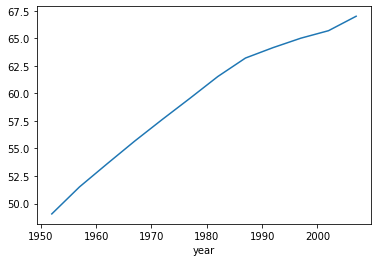

In [10]:
global_yearly_life_expectancy.plot()